In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [ ]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [ ]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
train.shape

(50882, 14)

In [ ]:
test.shape

(21805, 13)

In [ ]:

def combine_df(train,test):
  train['is_train'] = 1
  test['is_train'] = 0
  return pd.concat([train,test],axis=0)

In [ ]:
combined = combine_df(train,test)

In [ ]:
combined['Holding_Policy_Duration'] = combined['Holding_Policy_Duration'].replace(['14+'], 15.0)
combined['Holding_Policy_Duration'].head(10)

0      15
1     NaN
2     1.0
3      15
4     3.0
5     5.0
6     NaN
7     9.0
8    14.0
9     7.0
Name: Holding_Policy_Duration, dtype: object

In [ ]:
combined['Health Indicator'] = combined['Health Indicator'].fillna(combined['Health Indicator'].mode()[0])
combined['Holding_Policy_Duration'] = combined['Holding_Policy_Duration'].fillna(combined['Holding_Policy_Duration'].mode()[0])
combined['Holding_Policy_Type'] = combined['Holding_Policy_Type'].fillna(combined['Holding_Policy_Type'].mode()[0])

In [ ]:
combined.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
is_train                       0
dtype: int64

In [ ]:
def print_score(m):
  all_metrics = [m.score(X_train,y_train),m.score(X_valid,y_valid)]
  if hasattr(m,"oob_score"):
    all_metrics.append(m.oob_score)
  return all_metrics 

In [ ]:
#combined = pd.get_dummies(combined,columns=['Holding_Policy_Type', 'Health Indicator','Reco_Insurance_Type','Accomodation_Type','Is_Spouse'])

In [ ]:
#combined.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,is_train,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,Accomodation_Type_Owned,Accomodation_Type_Rented,Is_Spouse_No,Is_Spouse_Yes
0,1,C3,3213,36,36,15,22,11628.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,2,C5,1117,75,22,1.0,22,30510.0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
2,3,C5,3732,32,32,1.0,19,7450.0,1.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,4,C24,4378,52,48,15,19,17780.0,0.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,5,C8,2190,44,44,3.0,16,10404.0,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
combined['City_Code']=le.fit_transform(combined['City_Code'])
combined['Holding_Policy_Type']=le.fit_transform(combined['Holding_Policy_Type'])
combined['Reco_Insurance_Type']=le.fit_transform(combined['Reco_Insurance_Type'])
combined['Accomodation_Type']=le.fit_transform(combined['Accomodation_Type'])
combined['Is_Spouse']=le.fit_transform(combined['Is_Spouse'])

In [ ]:
combined['Health Indicator']=le.fit_transform(combined['Health Indicator'])

In [ ]:
combined.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,is_train
0,1,22,3213,1,0,36,36,0,0,15,2,22,11628.0,0.0,1
1,2,31,1117,0,1,75,22,0,1,1.0,2,22,30510.0,0.0,1
2,3,31,3732,0,0,32,32,0,0,1.0,0,19,7450.0,1.0,1
3,4,16,4378,0,1,52,48,0,0,15,2,19,17780.0,0.0,1
4,5,34,2190,1,0,44,44,0,1,3.0,0,16,10404.0,0.0,1


In [ ]:
combined['Holding_Policy_Duration'] = pd.to_numeric(combined['Holding_Policy_Duration'])

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       72687 non-null  int64  
 1   City_Code                72687 non-null  int64  
 2   Region_Code              72687 non-null  int64  
 3   Accomodation_Type        72687 non-null  int64  
 4   Reco_Insurance_Type      72687 non-null  int64  
 5   Upper_Age                72687 non-null  int64  
 6   Lower_Age                72687 non-null  int64  
 7   Is_Spouse                72687 non-null  int64  
 8   Health Indicator         72687 non-null  int64  
 9   Holding_Policy_Duration  72687 non-null  float64
 10  Holding_Policy_Type      72687 non-null  int64  
 11  Reco_Policy_Cat          72687 non-null  int64  
 12  Reco_Policy_Premium      72687 non-null  float64
 13  Response                 50882 non-null  float64
 14  is_train              

In [ ]:
train_df = combined[combined['is_train'] == 1].drop("is_train",axis=1)
test_df = combined[combined['is_train'] == 0].drop("is_train",axis=1)

In [ ]:
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,50883,0,156,0,0,30,30,0,0,6.0,2,5,11934.0,NaN
1,50884,30,7,0,1,69,68,1,0,3.0,2,18,32204.8,NaN
2,50885,0,564,1,0,28,28,0,2,2.0,3,17,9240.0,NaN
3,50886,22,1177,1,0,23,23,0,2,3.0,2,18,9086.0,NaN
4,50887,0,951,0,0,75,75,0,2,1.0,2,5,22534.0,NaN


In [ ]:
test_df=test_df.drop(['Response'],axis=1)

In [ ]:
train_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,15.0,2,22,11628.0,0.0
1,2,31,1117,0,1,75,22,0,1,1.0,2,22,30510.0,0.0
2,3,31,3732,0,0,32,32,0,0,1.0,0,19,7450.0,1.0
3,4,16,4378,0,1,52,48,0,0,15.0,2,19,17780.0,0.0
4,5,34,2190,1,0,44,44,0,1,3.0,0,16,10404.0,0.0


In [ ]:
train_df.corr()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.003275,-0.000465,-0.004649,-0.008505,-0.001725,0.001101,-0.004262,0.001563,-0.002806,0.004605,-0.002235,-0.002350,0.005159
City_Code,-0.003275,1.000000,0.059562,0.054010,-0.053742,-0.144504,-0.136441,-0.052259,-0.012762,-0.078983,-0.000466,-0.084928,-0.144310,-0.000495
Region_Code,-0.000465,0.059562,1.000000,0.009105,-0.004275,-0.005649,-0.005928,-0.002567,0.017058,0.014324,0.009348,-0.065120,-0.010797,0.001121
Accomodation_Type,-0.004649,0.054010,0.009105,1.000000,-0.196833,-0.419129,-0.369400,-0.191045,-0.038414,-0.221938,-0.055255,-0.022055,-0.350514,-0.005201
Reco_Insurance_Type,-0.008505,-0.053742,-0.004275,-0.196833,1.000000,0.227119,-0.014998,0.881560,0.039813,0.102279,0.033907,0.020826,0.596160,0.009891
Upper_Age,-0.001725,-0.144504,-0.005649,-0.419129,0.227119,1.000000,0.921392,0.202947,0.019547,0.370691,0.002579,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.136441,-0.005928,-0.369400,-0.014998,0.921392,1.000000,0.062634,0.014362,0.334359,-0.001842,0.021163,0.615739,-0.002099
Is_Spouse,-0.004262,-0.052259,-0.002567,-0.191045,0.881560,0.202947,0.062634,1.000000,0.042963,0.091370,0.043596,0.022676,0.514727,0.003859
Health Indicator,0.001563,-0.012762,0.017058,-0.038414,0.039813,0.019547,0.014362,0.042963,1.000000,0.013950,0.029842,-0.004402,0.033874,0.002239
Holding_Policy_Duration,-0.002806,-0.078983,0.014324,-0.221938,0.102279,0.370691,0.334359,0.091370,0.013950,1.000000,-0.080730,0.035633,0.283068,0.014844


Text(0.5, 1.0, 'Co-Relation of all features in DataSet')

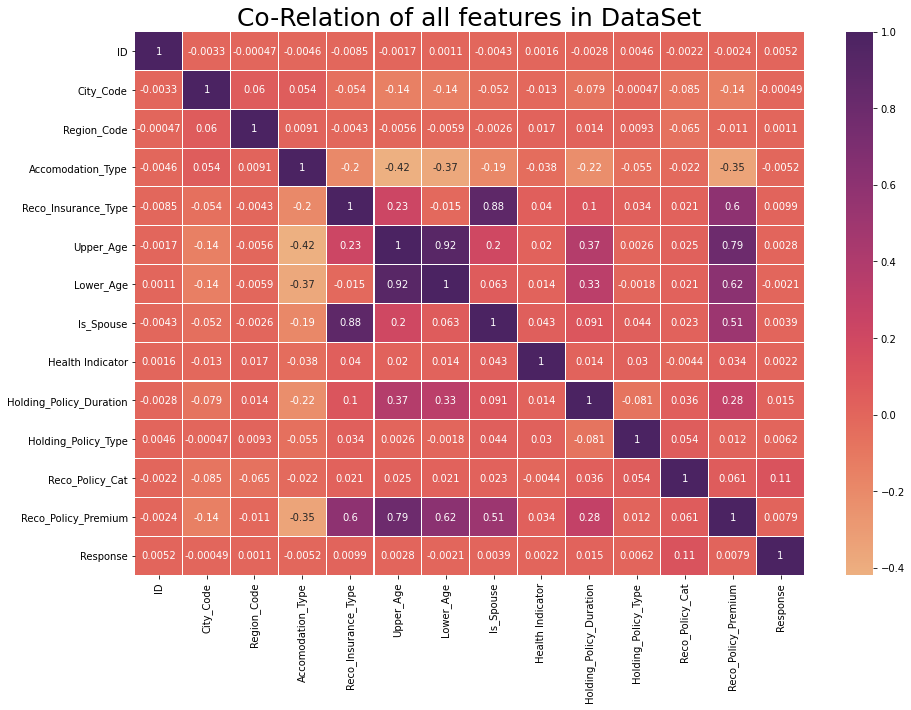

In [ ]:
plt.rcParams['figure.figsize'] = [15,10]
sns.heatmap(train_df.corr(), cmap="flare", linewidths= 0.10,annot=True)
plt.title('Co-Relation of all features in DataSet', fontsize = 25)

In [ ]:
X = train_df.drop(["Response"],axis=1)
y = train_df['Response']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm

In [ ]:
m1 = RandomForestClassifier(oob_score = True)

In [ ]:
m1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print_score(m1)  

[1.0, 0.7535619534243884, True]

In [ ]:
m1.fit(X_valid,y_valid)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print_score(m1) 

[0.7578430168283995, 0.999901739215879, True]

In [ ]:
X_test = test_df

In [ ]:
y_pred = m1.predict(X_test)

In [ ]:
submission_test_v1 = pd.concat([test_df['ID'],pd.Series(y_pred)],axis=1)

In [ ]:
submission_test_v1.columns = ['ID','Response']

In [ ]:
submission_test_v1.to_csv("submission_v2.csv",index=False) 

In [ ]:
submission_test_v1.shape

(21805, 2)

In [ ]:
m2 = lightgbm.LGBMClassifier(n_estimators=200,learning_rate=0.1)

In [ ]:
m2.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print_score(m2)

[0.7828276624493306, 0.75464282204972]

In [ ]:
m2.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
X_test = test_df

In [ ]:
y_pred = m2.predict(X_test)

In [ ]:
submission_test_v1 = pd.concat([test_df['ID'],pd.Series(y_pred)],axis=1)

In [ ]:
submission_test_v1.columns = ['ID','Response']

In [ ]:
submission_test_v1['Response'].value_counts()

0.0    21221
1.0      584
Name: Response, dtype: int64

In [ ]:
submission_test_v1.to_csv("submission_v10_lgbm.csv",index=False)  #normalized and dummies

In [ ]:
submission_test_v1.shape

(21805, 2)

In [ ]:
!pip install catboost
import catboost

     |████████████████████████████████| 65.7MB 60kB/s 


In [ ]:
m3 = catboost.CatBoostClassifier(iterations=100)

In [ ]:
m3.fit(X_train,y_train)

Learning rate set to 0.414242
0:	learn: 0.6008153	total: 62.1ms	remaining: 6.15s
1:	learn: 0.5636531	total: 72.3ms	remaining: 3.54s
2:	learn: 0.5485425	total: 82ms	remaining: 2.65s
3:	learn: 0.5424123	total: 91.7ms	remaining: 2.2s
4:	learn: 0.5362976	total: 111ms	remaining: 2.11s
5:	learn: 0.5334346	total: 122ms	remaining: 1.92s
6:	learn: 0.5312575	total: 132ms	remaining: 1.76s
7:	learn: 0.5287554	total: 142ms	remaining: 1.64s
8:	learn: 0.5283611	total: 152ms	remaining: 1.54s
9:	learn: 0.5272726	total: 162ms	remaining: 1.46s
10:	learn: 0.5266361	total: 172ms	remaining: 1.39s
11:	learn: 0.5255836	total: 182ms	remaining: 1.34s
12:	learn: 0.5249267	total: 193ms	remaining: 1.29s
13:	learn: 0.5240120	total: 207ms	remaining: 1.27s
14:	learn: 0.5231358	total: 217ms	remaining: 1.23s
15:	learn: 0.5215460	total: 228ms	remaining: 1.2s
16:	learn: 0.5202773	total: 239ms	remaining: 1.17s
17:	learn: 0.5197961	total: 249ms	remaining: 1.14s
18:	learn: 0.5188576	total: 260ms	remaining: 1.11s
19:	learn: 

In [ ]:
print_score(m3)

[0.7722147156368997, 0.7541515181291146]

In [ ]:
X_test = test_df

In [ ]:
y_pred = m3.predict(X_test)

In [ ]:
submission_test_v1 = pd.concat([test_df['ID'],pd.Series(y_pred)],axis=1)

In [ ]:
submission_test_v1.columns = ['ID','Response']

In [ ]:
submission_test_v1.to_csv("submission_v4_catboost.csv",index=False)  #normalized and dummies

In [ ]:
import xgboost

In [ ]:
m4 = xgboost.XGBClassifier(n_estimators=200)

In [ ]:
m4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print_score(m4)

[0.7620194079351431, 0.7554289083226884]

In [ ]:
m4.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X_test = test_df

In [ ]:
y_pred = m3.predict(X_test)

In [ ]:
submission_test_v1 = pd.concat([test_df['ID'],pd.Series(y_pred)],axis=1)

In [ ]:
submission_test_v1.columns = ['ID','Response']

In [ ]:
submission_test_v1.to_csv("submission_v6_xgboost.csv",index=False)  #normalized and dummies

In [ ]:
!pip install vecstack
from vecstack import stacking 

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=26ee7c87453f0513ea23a6e5adf6c1f3b8d87318def1ddb3f51d74603eeb385e
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [ ]:
from sklearn.linear_model import LogisticRegression
m5 = LogisticRegression()
models = [m1, m2, m4, m5]

# Compute stacking features
S_train, S_test = stacking(models, X, y, X_test,
    regression = False, n_folds = 4,
    shuffle = True, random_state = 88, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [RandomForestClassifier]
    fold  0:  [0.75733040]
    fold  1:  [0.76078925]
    fold  2:  [0.75794025]
    fold  3:  [0.75503145]
    ----
    MEAN:     [0.75777284] + [0.00205169]
    FULL:     [0.75777289]

model  1:     [LGBMClassifier]
    fold  0:  [0.76181118]
    fold  1:  [0.76149674]
    fold  2:  [0.75966981]
    fold  3:  [0.75534591]
    ----
    MEAN:     [0.75958091] + [0.00257816]
    FULL:     [0.75958099]

model  2:     [XGBClassifier]
    fold  0:  [0.76039620]
    fold  1:  [0.76259728]
    fold  2:  [0.76077044]
    fold  3:  [0.75550314]
    ----
    MEAN:     [0.75981677] + [0.00262602]
    FULL:     [0.75981683]

model  3:     [LogisticRegression]
    fold  0:  [0.76078925]
    fold  1:  [0.76244006]
    fold  2:  [0.76029874]
    fold  3:  [0.75668239]
    ----
    MEAN:     [0.76005261] + [0.00210128]
    FULL:     [0.

In [ ]:
lr = LogisticRegression(max_iter=100)
model = lr

In [ ]:
model.fit(S_train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test_pred = model.predict(S_test)

In [ ]:
y_test_pred.shape

(21805,)

In [ ]:
submission_test_v1 = pd.concat([test_df['ID'],pd.Series(y_pred)],axis=1)

In [ ]:
submission_test_v1.columns = ['ID','Response']

In [ ]:
submission_test_v1.to_csv("submission_v8_stack.csv",index=False)  #normalized and dummies